In [1]:
# IMPORT THE LIBRARY
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
# Input the list of economic parameters:
eco_predictor_list = ['Coal', 'USEU', 'brent']

In [3]:
# Make one_in_all dataframe where we will save all information:
df_all = pd.read_csv(f'Monthly_Coal.csv')
df_all = df_all[['Date']]

In [4]:
# Save information (yahoo fiance) into one dataframe
for para in eco_predictor_list:
    df = pd.read_csv(f'Monthly_{para}.csv')
    df_all[para] = df['Close']

In [5]:
# Change dates in column 'Date' to strings in the format "%Y/%m"
df_all['Date'] = pd.to_datetime(df_all['Date']).apply(lambda t: t.strftime("%Y/%m"))

In [6]:
# EUA Price & Trading volume
df = pd.read_csv('Monthly_EUA.csv')
df['Date'] = pd.to_datetime(df['Date']).apply(lambda t: t.strftime("%Y/%m"))
df['EUA_Price'] = df['EUA Price']
df['EUA_Volume']=df['Volume']
df['Market_Size']=df['Market Size']
df_all = df_all.merge(df[['Date', 'EUA_Price','EUA_Volume', 'Market_Size']],  left_on='Date', right_on='Date')

In [7]:
# Natural Gas
df = pd.read_csv('Monthly_NG.csv')
df['DATE'] = pd.to_datetime(df['DATE']).apply(lambda t: t.strftime("%Y/%m"))
df['Natural Gas'] = df['NG Price']
df_all = df_all.merge(df[['DATE', 'Natural Gas']],  left_on='Date', right_on='DATE')

In [8]:
# Interest Rate
df = pd.read_csv('Monthly_IR.csv')
df['DATE'] = pd.to_datetime(df['DATE']).apply(lambda t: t.strftime("%Y/%m"))
df['IR'] = df['IR']
df_all = df_all.merge(df[['DATE', 'IR']],  left_on='Date', right_on='DATE')

In [9]:
# GDP growth rate
df = pd.read_csv('Monthly_GDP_growth.csv')
df['Date'] = df['observation_date']
df['GDP_growth'] = df['EA19LORSGPORGYSAM']
df = df[['Date', 'GDP_growth']]
df['Date'] = pd.to_datetime(df['Date']).apply(lambda t: t.strftime('%Y/%m'))
df_all = df_all.merge(df[['Date', 'GDP_growth']],  left_on='Date', right_on='Date')

In [10]:
# Convert quarterly power prices to monthly
df = pd.read_csv('Quarterly_Power.csv')
power = []
for value in df.Power.values[::-1]:
    power.append(value)

month = np.arange(0,49*3)
month_record = month[1::3]

month_power = np.interp(x = month, xp = month_record,fp =power)
df_all['Power'] = month_power[:145]

In [11]:
# Convert quarterly GDP to monthly
df = pd.read_csv('Quarterly_GDP.csv')
gdp = []
for value in df.values[0]:
    if (type(value) == float) and ~np.isnan(value):
        gdp.append(value)

month = np.arange(0,47*3)
month_record = month[1::3]

month_gdp = np.interp(x = month, xp = month_record,fp =gdp)
df_all['GDP'] = 118.504000
df_all.loc[:month_gdp.shape[0]-1,'GDP'] = month_gdp

C:\Users\oces0\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\oces0\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\oces0\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\oces0\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

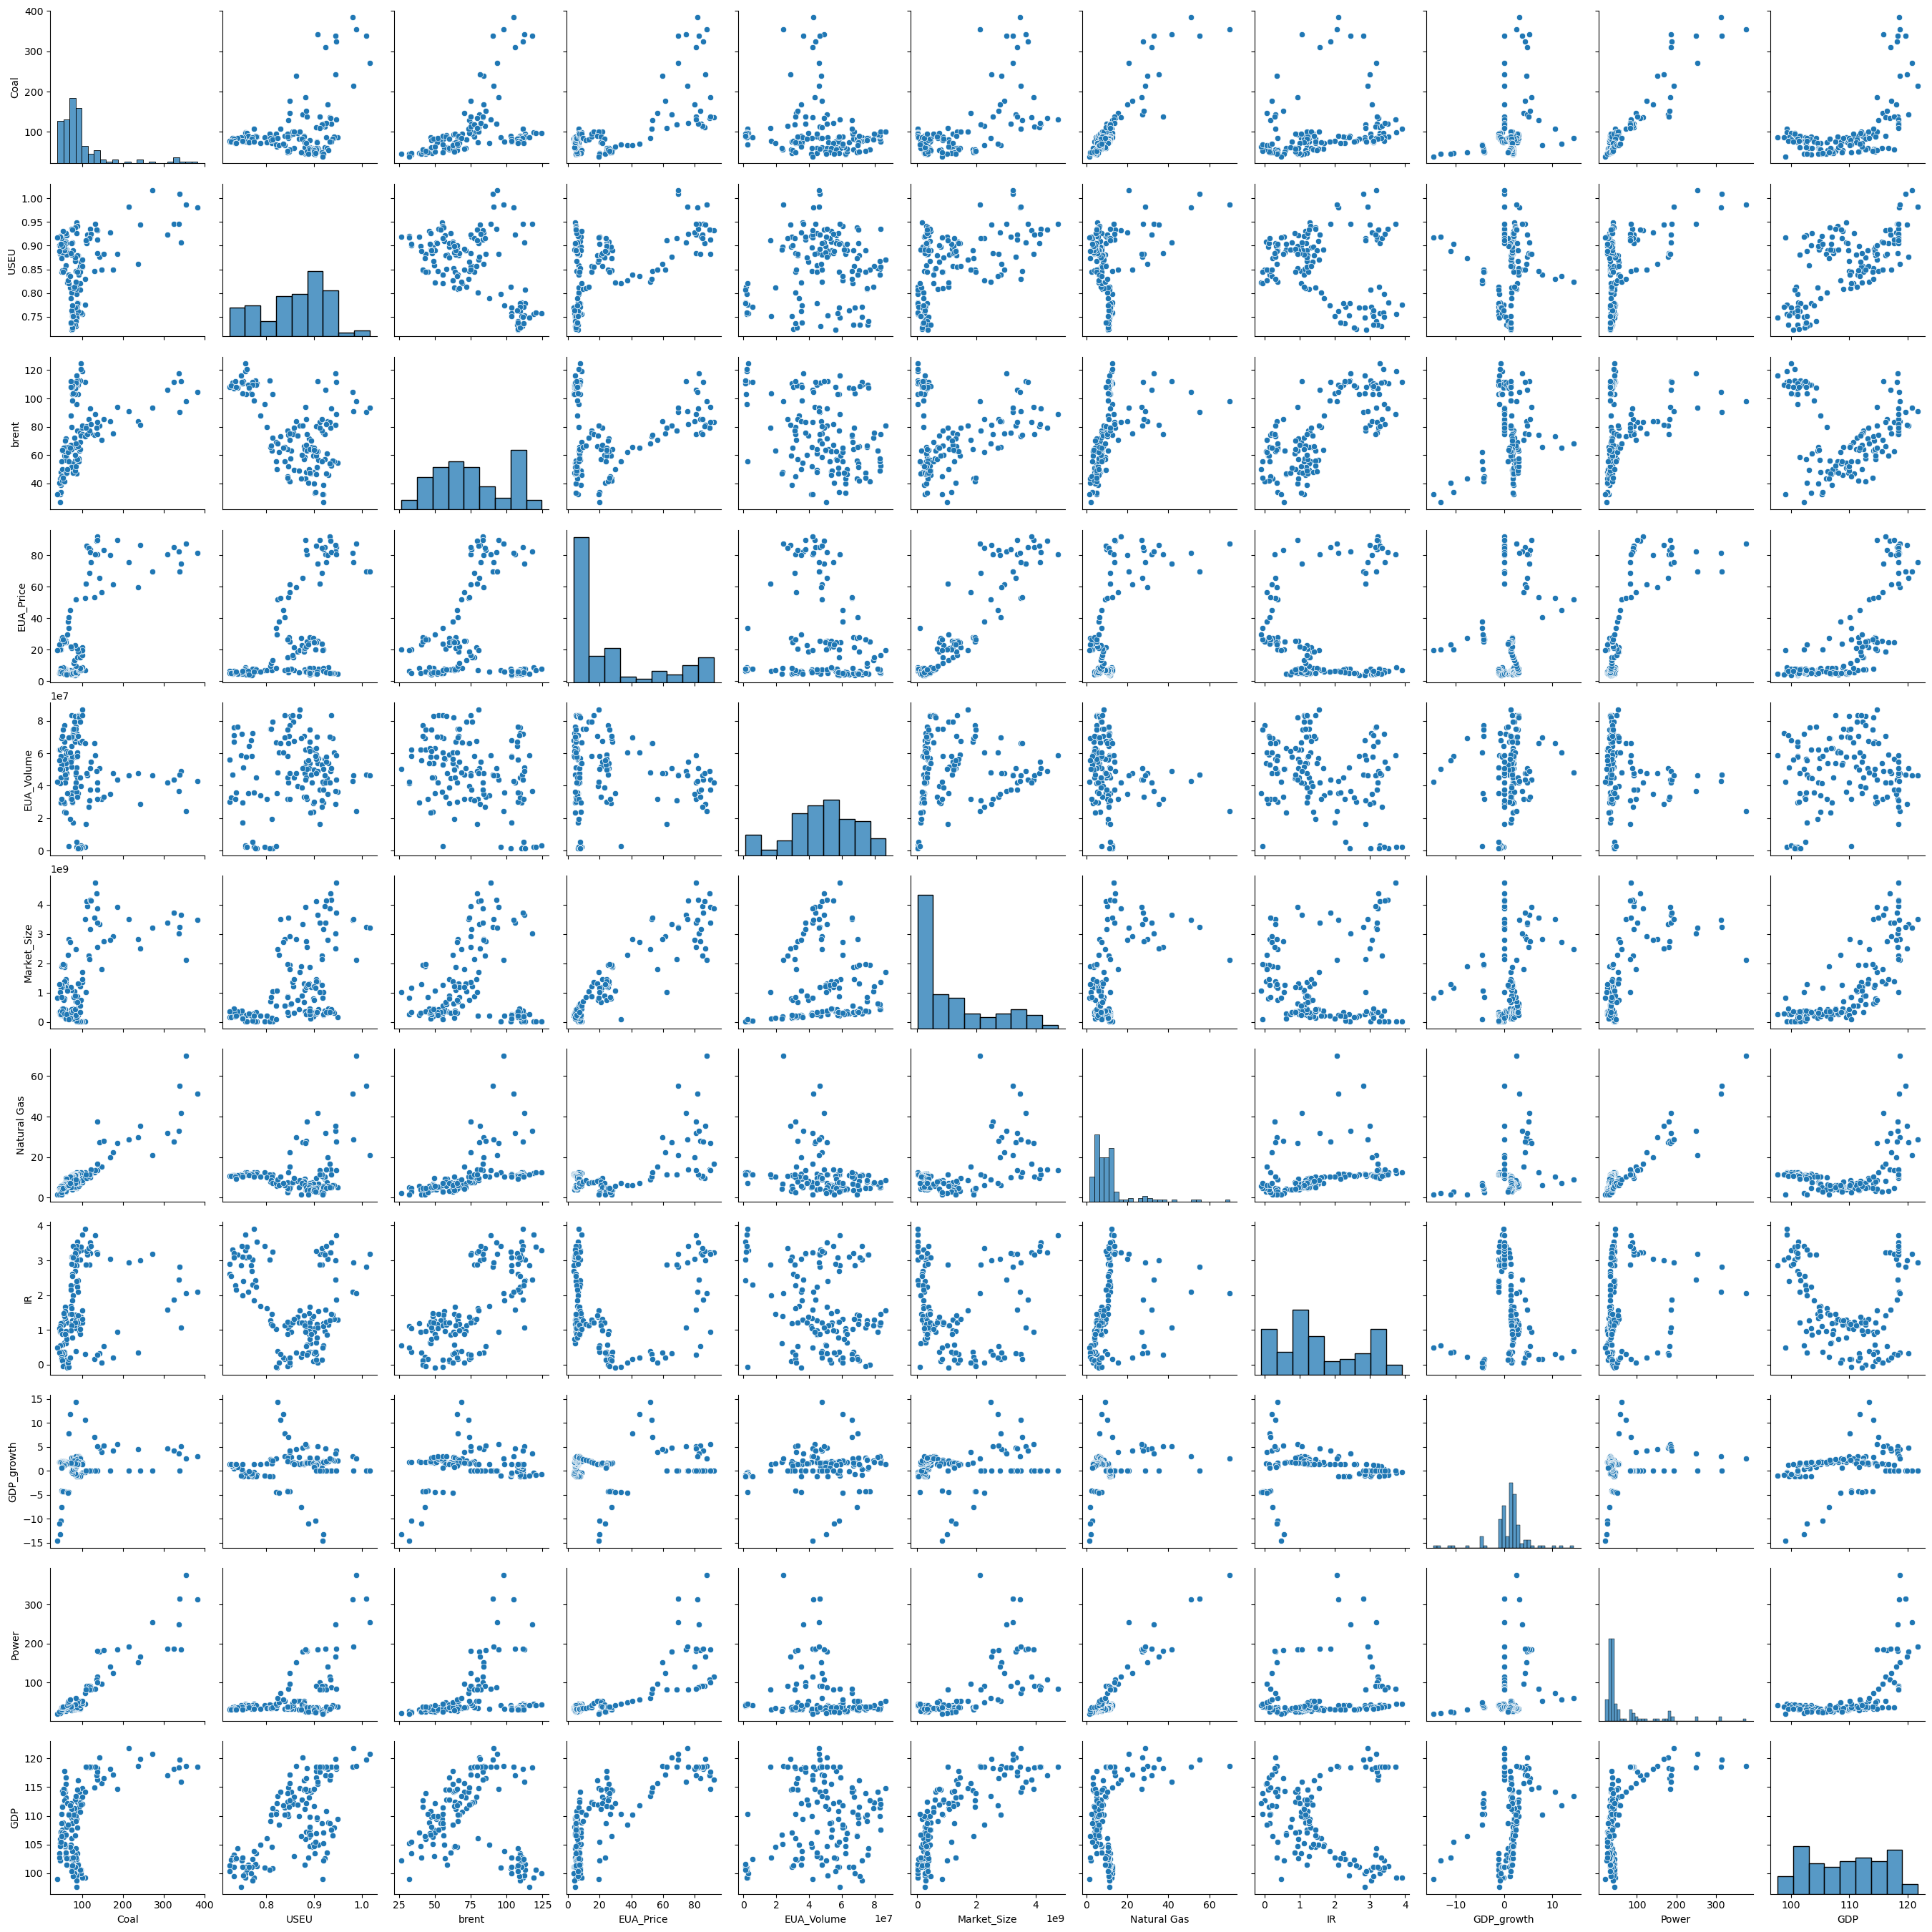

In [12]:
# Draw a pairplot for all variables.
sns.pairplot(df_all)

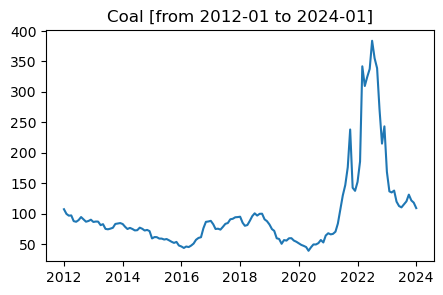

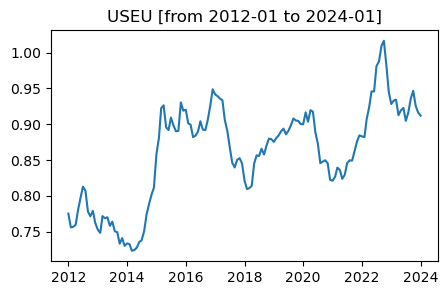

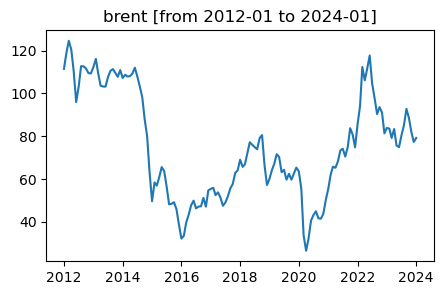

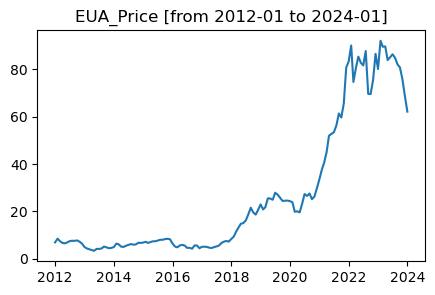

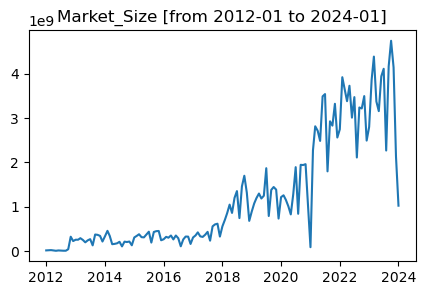

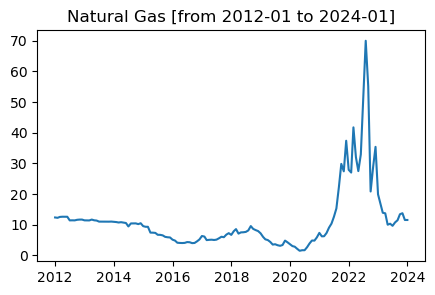

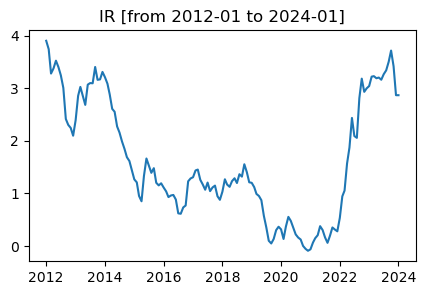

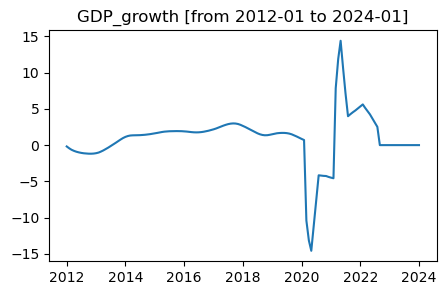

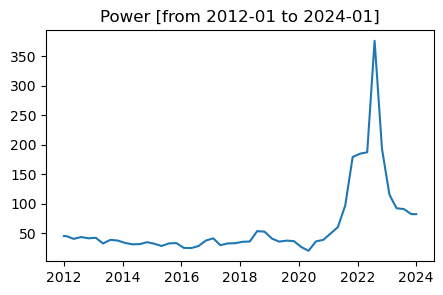

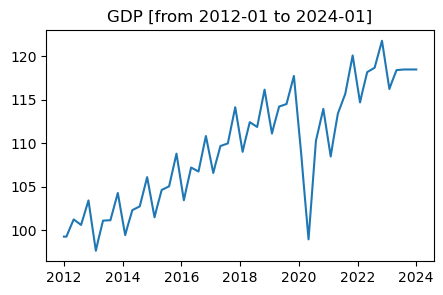

In [13]:
# Visualize data from January 2012 to January 2024
from datetime import datetime
date = df_all.Date
date = pd.to_datetime(date,format = "%Y/%m").values
for col in df_all.columns:
    if not  col in ['Date', 'DATE_x', 'DATE_y', 'EUA_Price_x', 'EUA_Volume_x', 'EUA_Price_y', 'EUA_Volume_y', 'EUA_Volume']:
        plt.figure(figsize = (5,3))
        plt.plot(date[:df_all.shape[0]], df_all[col])
        plt.title(f'{col} [from 2012-01 to 2024-01]')

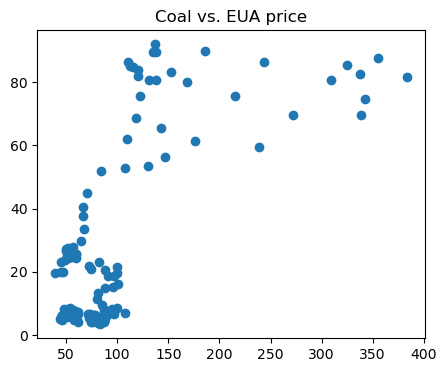

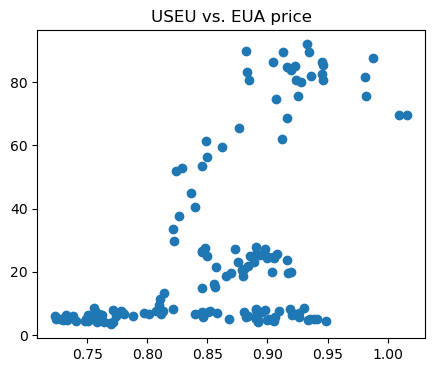

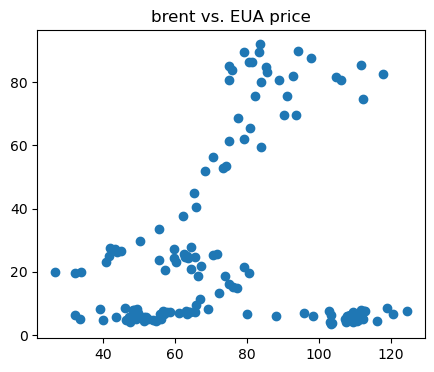

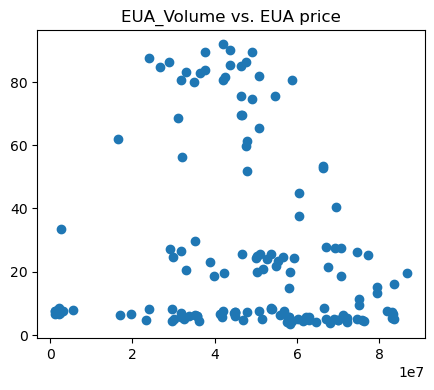

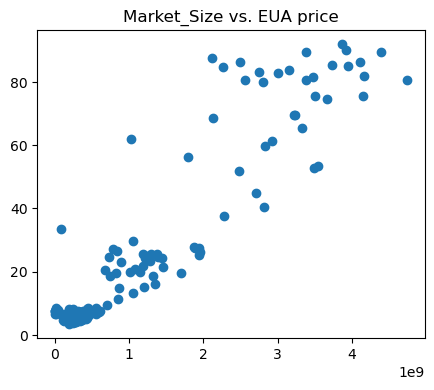

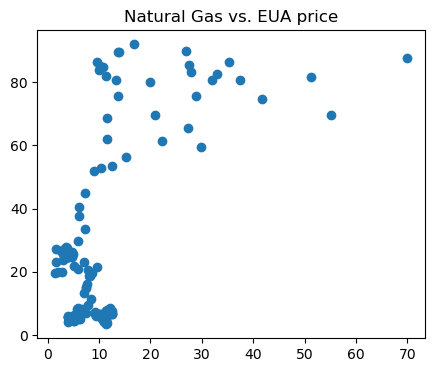

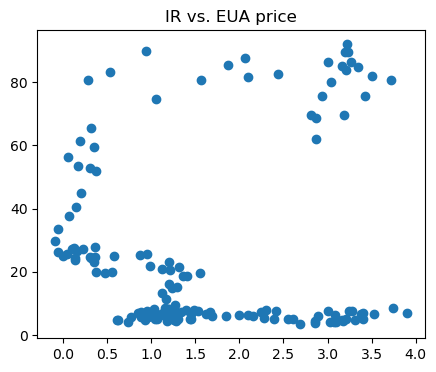

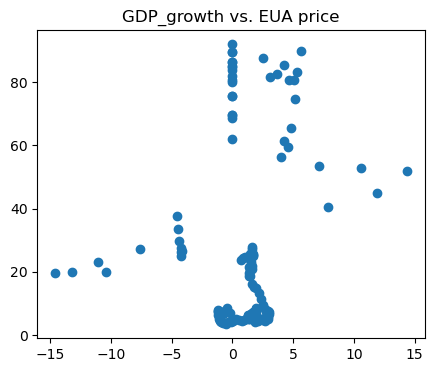

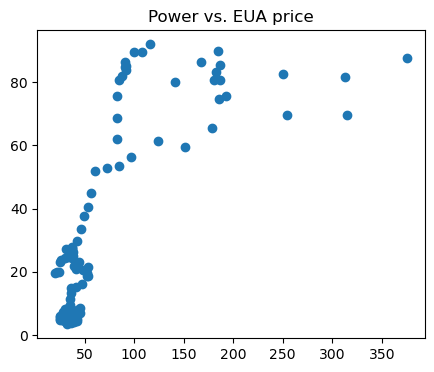

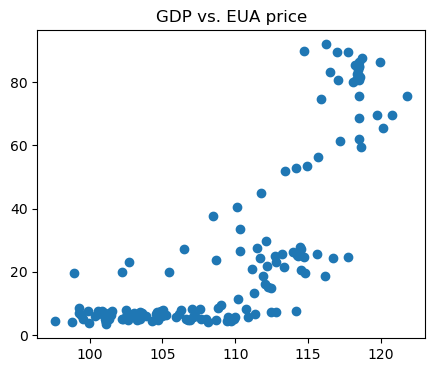

In [14]:
# Draw correlation between all variables and EUA price
for col in df_all.columns:
    if not  col in ['Date', 'EUA_Price', 'DATE_x', 'DATE_y', 'EUA_Price_x', 'EUA_Volume_x', 'EUA_Price_y', 'EUA_Volume_y']:
        plt.figure(figsize = (5,4))
        plt.title(f'{col} vs. EUA price')
        plt.scatter(df_all[col], df_all['EUA_Price'])

In [15]:
# Delete unneeded variables
#columns_to_drop = ['DATE_x', 'DATE_y','GDP_growth', 'EUA_Volume']
#df_all.drop(columns=columns_to_drop, inplace=True)

In [16]:
# Delete unneeded variables
columns_to_drop = ['DATE_x', 'DATE_y', 'EUA_Volume']
df_all.drop(columns=columns_to_drop, inplace=True)

In [17]:
df_except_D = df_all.drop(columns=['Date'])

# Calculatie correlation
correlation_matrix1 = df_except_D.corr()
print(correlation_matrix1)

                 Coal      USEU     brent  EUA_Price  Market_Size  \
Coal         1.000000  0.358994  0.436536   0.693058     0.604445   
USEU         0.358994  1.000000 -0.524217   0.520994     0.502779   
brent        0.436536 -0.524217  1.000000   0.154650     0.078296   
EUA_Price    0.693058  0.520994  0.154650   1.000000     0.929394   
Market_Size  0.604445  0.502779  0.078296   0.929394     1.000000   
Natural Gas  0.906749  0.225252  0.480130   0.619500     0.489825   
IR           0.255387 -0.268279  0.727921   0.121830     0.023916   
GDP_growth   0.243031  0.038468  0.126775   0.151332     0.186901   
Power        0.932815  0.456946  0.320573   0.779229     0.672207   
GDP          0.528059  0.668388 -0.177779   0.790011     0.784780   

             Natural Gas        IR  GDP_growth     Power       GDP  
Coal            0.906749  0.255387    0.243031  0.932815  0.528059  
USEU            0.225252 -0.268279    0.038468  0.456946  0.668388  
brent           0.480130  0.72792

In [18]:
df_all

,Date,Coal,USEU,brent,EUA_Price,Market_Size,Natural Gas,IR,GDP_growth,Power,GDP
0,2012/01,107.402500,0.775238,111.465000,6.973333,1.638733e+07,12.330000,3.9060,-0.183739,45.100000,99.260000
1,2012/02,99.757500,0.756058,119.010501,8.516000,1.873520e+07,12.220000,3.7461,-0.438430,45.100000,99.260000
2,2012/03,96.890910,0.756705,124.544546,7.498333,2.286992e+07,12.510000,3.2821,-0.641667,43.530000,99.919333
3,2012/04,97.227500,0.759512,120.486500,6.718000,1.477960e+07,12.570000,3.3809,-0.797179,41.960000,100.578667
4,2012/05,87.886364,0.780287,110.433182,6.547500,7.857000e+06,12.570000,3.5270,-0.915055,40.390000,101.238000
...,...,...,...,...,...,...,...,...,...,...,...
140,2023/09,120.313500,0.935921,92.766499,81.992778,4.166996e+09,11.427930,3.5056,0.000000,87.943333,118.504000
141,2023/10,131.353637,0.946569,88.704091,80.714286,4.744386e+09,13.388843,3.7200,0.000000,85.106667,118.504000
142,2023/11,121.861905,0.925527,82.027727,75.691053,4.143669e+09,13.714316,3.4200,0.000000,82.270000,118.504000
143,2023/12,118.182501,0.916318,77.324000,68.738182,2.134286e+09,11.510000,2.8700,0.000000,82.270000,118.504000


In [19]:
# Save combined data
# df_all.to_csv('Data_concentration.csv')